<a href="https://colab.research.google.com/github/iamemc/PD_01/blob/main/PD_202021_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining / Prospeção de Dados

## Diogo Soares and Sara C. Madeira, 2020/21

# Project 1 - Pattern Mining

## Logistics 
**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

**TASK 3 - Spring vs Summer Purchases** must be done only by groups of 3 people.

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `March, 28th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P1.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools



In this project you will analyse data from an online Store collected over 4 months (April - July 2014). The folder `data` contains three files that you should use to obtain the dataset to be used in pattern mining. 

The file `store-buys.dat` comprises the buy events of the users over the items. It contains **318.444 sessions**. Each record/line in the file has the following fields (with this order): 

* **Session ID** - the id of the session. In one session there are one or many buying events. Could be represented as an integer number.
* **Timestamp** - the time when the buy occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
* **Item ID** – the unique identifier of item that has been bought. Could be represented as an integer number. 
* **Price** – the price of the item. Could be represented as an integer number.
* **Quantity** – the quantity in this buying.  Could be represented as an integer number.

The file `store-clicks.dat` comprises the clicks of the users over the items. It contains **5.613.499 sessions**.  Each record/line in the file has the following fields (with this order):

* **Session ID** – the id of the session. In one session there are one or many clicks. Could be represented as an integer number.
* **Timestamp** – the time when the click occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
* **Item ID** – the unique identifier of the item that has been clicked. Could be represented as an integer number.
* **Context** – the context of the click. The value "S" indicates a special offer, "0" indicates  a missing value, a number between 1 to 12 indicates a real category identifier,
any other number indicates a brand. E.g. if an item has been clicked in the context of a promotion or special offer then the value will be "S", if the context was a brand i.e BOSCH,
then the value will be an 8-10 digits number. If the item has been clicked under regular category, i.e. sport, then the value will be a number between 1 to 12. 
 
The file `products.csv` comprises the list of products sold by the online store. It contains **46.294 different products** associated with **123 different subcategories**. Each record/line in the file has the following fields:

* **Item ID** - the unique identifier of the item. Could be represented as an integer number. 
* **Product Categories** - the category and subcategories of the item. It is a string containing the category and subcategories of the item. Eg. `appliances.kitchen.juice`


In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[MLxtend](http://rasbt.github.io/mlxtend/)**. When using MLxtend, frequent patterns can either be discovered using `Apriori` and `FP-Growth`. **Choose the pattern mining algorithm to be used.** 


## Team Identification

**GROUP PD03**

Students:

* Eduardo Carvalho - nº55881
* Filipe Santos - nº55142
* Ivo Oliveira - nº50301

## 1. Mining Frequent Itemsets and Association Rules


In this first part of the project you should load and preprocess the dataset  in order to compute frequent itemsets and generate association rules considering all the sessions.

**In what follows keep the following question in mind and be creative!**

1. What are the most interesting products?
2. What are the most bought products?
3. Which products are bought together?
4. Can you find associations between the clicked products? 
5. Can you find associations highliting that when people buy a product/set of products also buy other product(s)?
6. Can you find associations highliting that when people click in a product/set of products also buy this product(s)?
7. Can you find relevant associated categories? 

### 1.1. Load and Preprocess Data

 **Product quantities should not be considered.**

In [473]:
#!pip install mlxtend
!pip install mlxtend --upgrade

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import QuadMesh
from matplotlib.text import Text
import seaborn as sns
from mlxtend.preprocessing import  TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [474]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [475]:
products=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/products.csv',
                     header=None,
                     names=['ItemID','Category'],
                     dtype={'ItemID': int, 'Category':str})
buys=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/store-buys.dat', 
                 header=None,
                 names=['SessionID','TimeStamp','ItemID','Price','Qty'],
                 dtype={'SessionID':np.int32, 'TimeStamp':str, 'ItemID': np.int32, 
                        'Price':np.int16, 'Qty':np.int8})
clicks=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/store-clicks.dat', 
                   header=None,
                   nrows=1000000,
                   names=['SessionID','TimeStamp','ItemID','Context'],
                   dtype={'SessionID':np.int32, 'TimeStamp':str, 'ItemID': np.int32, 
                        'Context':str})

In [476]:
buys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679489 entries, 0 to 679488
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   SessionID  679489 non-null  int32 
 1   TimeStamp  679489 non-null  object
 2   ItemID     679489 non-null  int32 
 3   Price      679489 non-null  int16 
 4   Qty        679489 non-null  int8  
dtypes: int16(1), int32(2), int8(1), object(1)
memory usage: 12.3+ MB


In [477]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   SessionID  1000000 non-null  int32 
 1   TimeStamp  1000000 non-null  object
 2   ItemID     1000000 non-null  int32 
 3   Context    1000000 non-null  object
dtypes: int32(2), object(2)
memory usage: 22.9+ MB


In [478]:
"""
DATABASE CORRECTIONS
products_no_duplicates - removed duplicates
buys_upd - added product names & season

rows with Price or Qty == 0 have been dropped
"""

products_no_duplicates = products.drop_duplicates().reset_index(drop=True)

buys_upd =pd.merge(buys,products_no_duplicates)
clicks_upd= pd.merge(clicks,products_no_duplicates)

#ignore prices/quantities of 0
#buys_upd = buys_upd[buys_upd.Price>0]
#buys_upd = buys_upd[buys_upd.Qty>0]
#no click_upd ver context=0 (missing value)

product_name_buys=[]
for cat in buys_upd.Category:
  product_name_buys.append(cat.split('.')[-1].replace('_',' ').title())
product_name_clicks=[]
for cat in clicks_upd.Category:
  product_name_clicks.append(cat.split('.')[-1].replace('_',' ').title())
#product_name[:5]

buys_upd['ProductName']=product_name_buys
buys_upd.head(5)
buys_upd=buys_upd.drop('Category', axis=1)
clicks_upd['ProductName']=product_name_clicks
clicks_upd=clicks_upd.drop('Category', axis=1)

dates_buys =[]
season_buys =[]
dates_clicks =[]
season_clicks =[]

for i in buys_upd["TimeStamp"]:
  dates_buys.append(i[:10])
  if i[5:7] == "04" or i[5:7] == "05":
     season_buys.append("Spring")
  elif i[5:7] == "06" or i[5:7] == "07":
    season_buys.append("Summer")
  else:
    season_buys.append("Other")

for i in clicks_upd["TimeStamp"]:
  dates_clicks.append(i[:10])
  if i[5:7] == "04" or i[5:7] == "05":
     season_clicks.append("Spring")
  elif i[5:7] == "06" or i[5:7] == "07":
    season_clicks.append("Summer")
  else:
    season_clicks.append("Other")

weekday_buys=[]
buys_upd["TimeStamp"] = pd.to_datetime(buys_upd["TimeStamp"])
buys_upd["Weekday_Num"]=buys_upd["TimeStamp"].dt.dayofweek 

for i in buys_upd["Weekday_Num"]:
  if i < 5: 
    weekday_buys.append("Weekday")
  else :
    weekday_buys.append("Weekend")

weekday_clicks=[]
clicks_upd["TimeStamp"] = pd.to_datetime(clicks_upd["TimeStamp"])
clicks_upd["Weekday_Num"]=clicks_upd["TimeStamp"].dt.dayofweek 

for i in clicks_upd["Weekday_Num"]:
  if i < 5: 
    weekday_clicks.append("Weekday")
  else :
    weekday_clicks.append("Weekend")
  
buys_upd = buys_upd.drop(columns=['TimeStamp'])
buys_upd.insert(1, "TimeStamp", dates_buys)
buys_upd["Season"] = season_buys
buys_upd["Weekday"] = weekday_buys
buys_upd.sort_values(by='TimeStamp')

clicks_upd = clicks_upd.drop(columns=['TimeStamp'])
clicks_upd.insert(1, "TimeStamp", dates_clicks)
clicks_upd["Season"] = season_clicks
clicks_upd["Weekday"] = weekday_clicks
clicks_upd.sort_values(by='TimeStamp')

,SessionID,TimeStamp,ItemID,Context,ProductName,Weekday_Num,Season,Weekday
731408,192062,2014-04-01,214835126,0,Toster,1,Spring,Weekday
706806,88983,2014-04-01,214820394,0,Meat Grinder,1,Spring,Weekday
706805,88983,2014-04-01,214820394,0,Meat Grinder,1,Spring,Weekday
706804,88983,2014-04-01,214820394,0,Meat Grinder,1,Spring,Weekday
706803,88983,2014-04-01,214820394,0,Meat Grinder,1,Spring,Weekday
...,...,...,...,...,...,...,...,...
52627,116348,2014-04-08,214821309,0,Blender,1,Spring,Weekday
994078,175544,2014-04-08,214536562,0,Tablet,1,Spring,Weekday
736192,252159,2014-04-08,214705115,0,Cultivator,1,Spring,Weekday
44141,296848,2014-04-08,214837485,0,Microwave,1,Spring,Weekday


In [479]:
buys_upd=buys_upd.sort_values(by='SessionID').reset_index(drop=True)
buys_upd.head()

,SessionID,TimeStamp,ItemID,Price,Qty,ProductName,Weekday_Num,Season,Weekday
0,11,2014-04-03,214821371,1046,1,Blender,3,Spring,Weekday
1,11,2014-04-03,214821371,1046,1,Blender,3,Spring,Weekday
2,12,2014-04-02,214717867,1778,4,Bag,2,Spring,Weekday
3,21,2014-04-07,214548744,3141,1,Skates,0,Spring,Weekday
4,21,2014-04-07,214838503,18745,1,Clocks,0,Spring,Weekday


Existem 113 registos duplicados. Precisamos de os remover para avançar com a análise.

In [480]:
buys_upd=buys_upd.drop_duplicates().reset_index(drop=True)
len(buys_upd)

620867

In [481]:
clicks_upd=clicks_upd.sort_values(by='SessionID').reset_index(drop=True)
clicks_upd.head()

,SessionID,TimeStamp,ItemID,Context,ProductName,Weekday_Num,Season,Weekday
0,1,2014-04-07,214536502,0,Tablet,0,Spring,Weekday
1,1,2014-04-07,214536500,0,Tablet,0,Spring,Weekday
2,1,2014-04-07,214536506,0,Tablet,0,Spring,Weekday
3,1,2014-04-07,214577561,0,Headphone,0,Spring,Weekday
4,2,2014-04-07,214825110,0,Smartphone,0,Spring,Weekday


In [482]:
len(clicks)-len(clicks.drop_duplicates())

2

Existem 46 registos duplicados. Precisamos de os remover para avançar com a análise.

In [483]:
clicks_upd=clicks_upd.drop_duplicates().reset_index(drop=True)

In [484]:
# What are the most interesting items? (most clicked)
most_clicks = clicks_upd.groupby(["ProductName"], as_index=False).count().sort_values(by="SessionID", ascending=False)
most_clicks = most_clicks[['ProductName','SessionID']].reset_index(drop=True)
most_clicks = most_clicks.rename(columns={'SessionID':'Clicks'})
most_clicks.index += 1 

most_clicks.head(10)

,ProductName,Clicks
1,Memory,71265
2,Blender,56013
3,Meat Grinder,32859
4,Tv,30177
5,Bag,25199
6,Iron,24884
7,Tonometer,19612
8,Notebook,17101
9,Washer,16526
10,Camera,16160


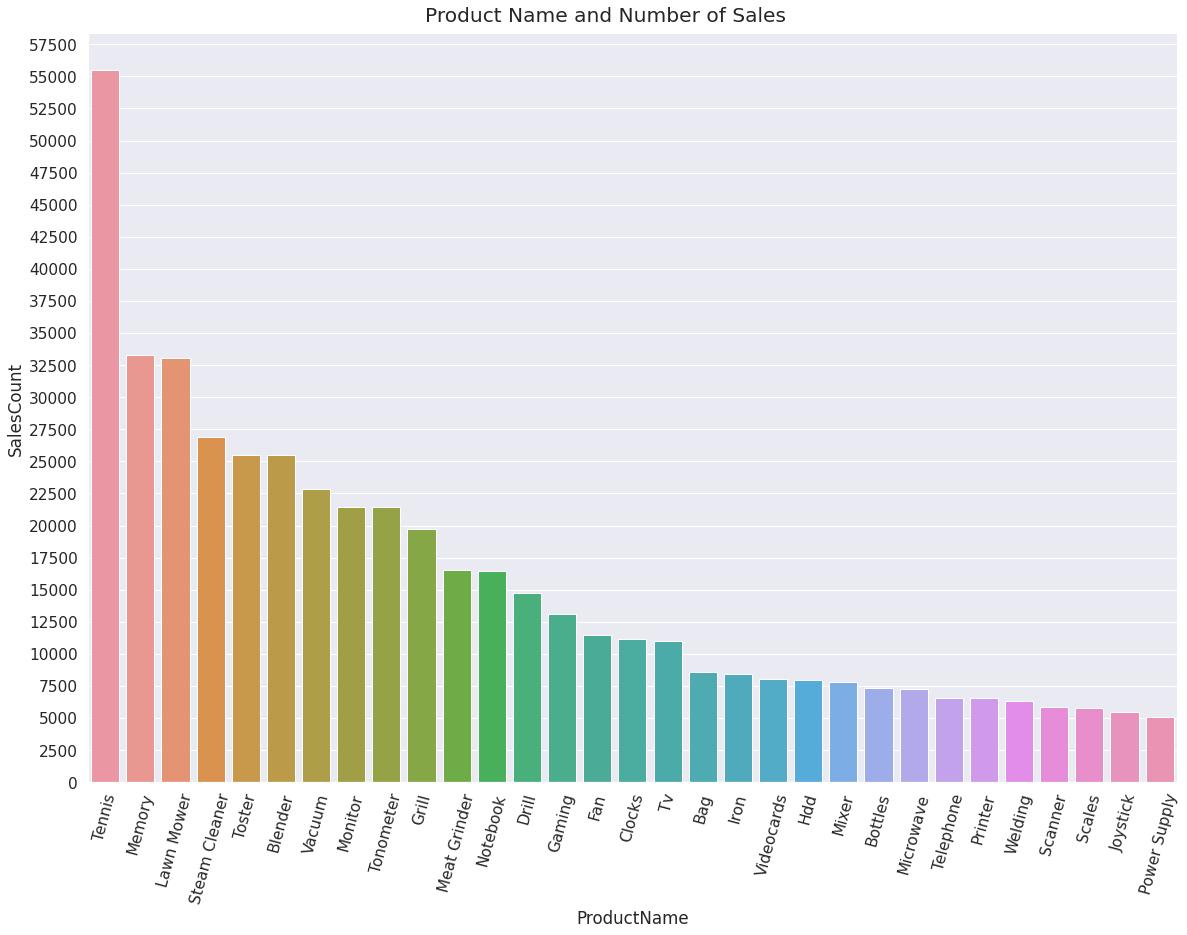

In [485]:
#2. What are the most bought products?
quantities = buys_upd.groupby(["ProductName"], as_index=False).count().sort_values(by="SessionID", ascending=False)
quantities2 = quantities
quantities = quantities[['ProductName','SessionID']].reset_index(drop=True)
quantities = quantities.rename(columns={'SessionID':'SalesCount'})
quantities.index += 1 

quantities.head(10)

quantities = quantities[quantities.SalesCount>5000]
most_bought = sns.catplot(x="ProductName", y="SalesCount", kind="bar", data = quantities)
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
most_bought.fig.suptitle('Product Name and Number of Sales')
for ax in most_bought.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(75)
most_bought.set(yticks=np.arange(0,60000,2500))
most_bought.fig.set_figheight(12.5)
most_bought.fig.set_figwidth(25)
#quantities_graph.show()

The most interesting products are blabla



In [487]:
quantities2 = buys_upd
quantities2['SessionID'] = 1

daysofWeek={0:'Segunda-Feira',1:'Terça-Feira',2:'Quarta-Feira',3:'Quinta-Feira', 4:'Sexta-Feira',5:'Sábado',6:'Domingo'}
quantities2['Weekday_Num'] = quantities2['Weekday_Num'].map(daysofWeek)

quantities2 = quantities2.groupby(["Weekday_Num","ProductName"], as_index=False)['SessionID'].sum()

drop_column = quantities2.groupby(['ProductName'], as_index=False)['SessionID'].sum()
drop_column = drop_column.sort_values(by='SessionID', ascending=False)
drop_column = drop_column.tail(-20)
drop_column = drop_column['ProductName']
quantities2 = quantities2[~quantities2['ProductName'].isin(drop_column)]
quantities2 = quantities2.sort_values(by='SessionID', ascending=False).reset_index(drop=True)
quantities2 = quantities2.pivot_table(index='Weekday_Num', columns = 'ProductName')['SessionID']
quantities2 = quantities2.reindex(['Segunda-Feira','Terça-Feira', 'Quarta-Feira','Quinta-Feira', 'Sexta-Feira','Sábado','Domingo'])
quantities2['Total'] = quantities2.sum(axis=1)

sns.set(font_scale = 1.4)
fig, ax = plt.subplots(figsize=(30,10))
formatter.set_scientific(False)
plt.suptitle("Product clicks per day of the week")
formatter = tkr.ScalarFormatter(useMathText=True)
sns.heatmap(quantities2, norm=LogNorm(), cmap='coolwarm', square=True, cbar_kws={"format":formatter}, linewidths=1, annot=True, fmt="d")
# get array of colors
quadmesh = ax.findobj(QuadMesh)[0]
facecolors = quadmesh.get_facecolors()
# make colors of the last column white
facecolors[np.arange(20,147,21)] = np.array([1,1,1,1])
# set modified colors
quadmesh.set_facecolors = facecolors
# set color of all text to black
for i in ax.findobj(Text):
    i.set_color('black')
plt.show()


KeyError: ignored

The most bought product category is **Tennis**.

## 1.2. Compute Frequent Itemsets

* Compute frequent itemsets considering a minimum support of X%. 
* Present frequent itemsets organized by length (number of items). 
* List frequent 1-itemsets, 2-itemsets, 3-itemsets, etc with support of at least Y%.
* Change X and Y when it makes sense and discuss the results.

In [ ]:
clicks_upd.head(3)

,SessionID,TimeStamp,ItemID,Context,ProductName,Weekday_Num,Season,Weekday
0,1,2014-04-07,214536502,0,Tablet,0,Spring,Weekday
1,1,2014-04-07,214536500,0,Tablet,0,Spring,Weekday
2,1,2014-04-07,214536506,0,Tablet,0,Spring,Weekday


In [ ]:
#3. Which products are bought together?
all_sessions_buy={}
for i in range(len(buys_upd)):
  all_sessions_buy[buys_upd.SessionID[i]]=[]

for i in range(len(buys_upd)):
  if buys_upd.ProductName[i] not in all_sessions_buy.get(buys_upd.SessionID[i]):
    all_sessions_buy[buys_upd.SessionID[i]].append(buys_upd.ProductName[i])

transactions_buy=list(all_sessions_buy.values())

In [ ]:
#3.1 Which products are viewed together?
all_sessions_click={}
for i in range(len(clicks_upd)):
  all_sessions_click[clicks_upd.SessionID[i]]=[]

for i in range(len(clicks_upd)):
  if clicks_upd.ProductName[i] not in all_sessions_click.get(clicks_upd.SessionID[i]):
    all_sessions_click[clicks_upd.SessionID[i]].append(clicks_upd.ProductName[i])

transactions_click=list(all_sessions_click.values())

AttributeError: ignored

In [ ]:
#Compute binary databases
tr_enc = TransactionEncoder()

#buys
trans_array_buy = tr_enc.fit(transactions_buy).transform(transactions_buy)
binary_database_buy = pd.DataFrame(trans_array_buy, columns=tr_enc.columns_)
binary_database_buy.head(3)
#clicks
trans_array_click = tr_enc.fit(transactions_click).transform(transactions_click)
binary_database_click = pd.DataFrame(trans_array_click, columns=tr_enc.columns_)
binary_database_click.head(3)

,Acoustic,Air Conditioner,Air Heater,Alarm,Anti Freeze,Bag,Bath,Battery,Bed,Bicycle,Blanket,Blender,Bottles,Cabinet,Calculator,Camera,Carriage,Cartrige,Cdrw,Chair,Climate,Clocks,Coffee Grinder,Coffee Machine,Compressor,Cooler,Costume,Cpu,Cultivator,Desktop,Diapers,Dictaphone,Dishwasher,Diving,Dolls,Drill,Ebooks,Fan,Faucet,Fryer,...,Scanner,Screw,Sewing Machine,Shelving,Shirt,Shoes,Skates,Ski,Smartphone,Snowboard,Sock,Sofa,Sound Card,Stapler,Steam Cleaner,Steam Cooker,Subwoofer,Swing,Table,Tablet,Telephone,Tennis,Toilet,Tonometer,Toster,Toys,Trainer,Trousers,Tshirt,Tv,Umbrella,Vacuum,Video,Videocards,Videoregister,Washer,Water Heater,Watering,Weather Station,Welding
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Compute itemsets min_support = 1% apriori and association rules

#buys
frequent_itemsets_buy = apriori(binary_database_buy, min_support=0.01, use_colnames=True)
frequent_itemsets_buy
#Rules grau 1
rules1_buy = association_rules(frequent_itemsets_buy, metric="confidence", min_threshold=0.01)
#rules1_buy
# add new column length
frequent_itemsets_buy['length'] = frequent_itemsets_buy['itemsets'].apply(lambda x: len(x))
# filter using pattern length = 2
frequent_2_itemsets_buy = frequent_itemsets_buy[frequent_itemsets_buy['length'] >= 2].reset_index(drop=True)
#frequent_2_itemsets_buy

#clicks
frequent_itemsets_click = apriori(binary_database_click, min_support=0.01, use_colnames=True)
frequent_itemsets_click
#Rules grau 1
rules1_click = association_rules(frequent_itemsets_click, metric="confidence", min_threshold=0.01)
#rules1_click
# add new column length
frequent_itemsets_click['length'] = frequent_itemsets_click['itemsets'].apply(lambda x: len(x))
# filter using pattern length = 2
frequent_2_itemsets_click = frequent_itemsets_click[frequent_itemsets_click['length'] >= 2].reset_index(drop=True)
#frequent_2_itemsets_click

In [ ]:
#FP-Growth é melhori que apriori
#buys
frequent_itemsets_fpg_buy=fpgrowth(binary_database_buy, min_support=0.01,use_colnames=True)
frequent_itemsets_fpg_buy
# Generate association rules with confidence >= 90%

rules_buy = association_rules(frequent_itemsets_fpg_buy, metric = "confidence", min_threshold=0.01)
rules_buy
#clicks
frequent_itemsets_fpg_click=fpgrowth(binary_database_click, min_support=0.01,use_colnames=True)
frequent_itemsets_fpg_click
# Generate association rules with confidence >= 90%

rules_click = association_rules(frequent_itemsets_fpg_click, metric = "confidence", min_threshold=0.01)
rules_click

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Tv),(Bag),0.075529,0.081793,0.022559,0.298684,3.651720,0.016382,1.309264
1,(Bag),(Tv),0.081793,0.075529,0.022559,0.275809,3.651720,0.016382,1.276558
2,(Tv),(Notebook),0.075529,0.055503,0.011295,0.149550,2.694475,0.007103,1.110586
3,(Notebook),(Tv),0.055503,0.075529,0.011295,0.203510,2.694475,0.007103,1.160681
4,(Notebook),(Blender),0.055503,0.173125,0.012313,0.221837,1.281366,0.002704,1.062598
5,(Blender),(Notebook),0.173125,0.055503,0.012313,0.071119,1.281366,0.002704,1.016812
6,(Notebook),(Bag),0.055503,0.081793,0.011637,0.209666,2.563380,0.007097,1.161796
7,(Bag),(Notebook),0.081793,0.055503,0.011637,0.142274,2.563380,0.007097,1.101165
8,(Memory),(Blender),0.185866,0.173125,0.038725,0.208347,1.203443,0.006546,1.044491
9,(Blender),(Memory),0.173125,0.185866,0.038725,0.223679,1.203443,0.006546,1.048708


### 1.3. Generate Association Rules from Frequent Itemsets

* Generate association rules with a choosed value (C) for minimum confidence. 
* Generate association rules with a choosed value (L) for minimum lift. 
* Generate association rules with both confidence >= C% and lift >= L.
* Change C and L when it makes sense and discuss the results.

### 1.4. Take a Look at Maximal Patterns: Compute Maximal Frequent Itemsets

### 1.5. Conclusions 

# 2. Week vs Weekend Purchases

In this part of the project you should analyse the consumption patterns during the week vs during the weekeed.

**In what follows keep the following question in mind and be creative!**

1. The most interesting products are the same during the week and the weekend? 
2. What are the most bought products during the week? And during the weekend?
3. There are differences between the sets of products bought during the week and the weekend?
4. Can you find different associations highliting that when people click in a product/set of products also buy this product(s) during the week vs the weekend?
5. Discuss the results obtained for the week sessions vs weekend sessions.

### 2.1. Load and Preprocess Data

 **Product quantities should not be considered.**

### 2.2. Compute Frequent Itemsets

* Compute frequent itemsets considering a minimum support of X%. 
* Present frequent itemsets organized by length (number of items). 
* List frequent 1-itemsets, 2-itemsets, 3-itemsets, etc with support of at least Y%.
* Change X and Y when it makes sense and discuss the results.

### 2.3. Generate Association Rules from Frequent Itemsets

* Generate association rules with a choosed value (C) for minimum confidence. 
* Generate association rules with a choosed value (L) for minimum lift. 
* Generate association rules with both confidence >= C% and lift >= L.
* Change C and L when it makes sense and discuss the results.

### 2.4. Conclusions 

# 3. [Only Groups of 3] Spring vs Summer Purchases

In this part of the project you should analyse the consumption patterns during the Spring months (April and May) vs Summer months (June and July).

**In what follows keep the following question in mind and be creative!**

1. The most interesting products are the same during the Spring and the Summer? 
2. What are the most bought products during the Spring? And during the Summer?
3. There are differences between the sets of products bought during the Spring and the Summer?
4. Can you find different associations highliting that when people click in a product/set of products also buy this product(s) during the Spring vs the Summer?
5. Discuss the results obtained for the Spring sessions vs Summer sessions.

### 3.1. Load and Preprocess Data

 **Product quantities should not be considered.**

### 3.2. Compute Frequent Itemsets

* Compute frequent itemsets considering a minimum support of X%. 
* Present frequent itemsets organized by length (number of items). 
* List frequent 1-itemsets, 2-itemsets, 3-itemsets, etc with support of at least Y%.
* Change X and Y when it makes sense and discuss the results.

### 3.3. Generate Association Rules from Frequent Itemsets

* Generate association rules with a choosed value (C) for minimum confidence. 
* Generate association rules with a choosed value (L) for minimum lift. 
* Generate association rules with both confidence >= C% and lift >= L.
* Change C and L when it makes sense and discuss the results.

### 3.4. Conclusions 

## 4. Conclusions
Draw some conclusions about this project work.